<a href="https://colab.research.google.com/github/ludmilaprolygin/scribd-downloader/blob/main/Scribd_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**I love la digitalizacion del material**


---

Como ASAM no tiene el contenido digitalizado (y yo lo quiero digitalizado xd), y yo pague el libro fisico...
[Aca](https://www.scribd.com/doc/253867142/LSA-ASAM-Jose-Antonio-Terry-Tomo-1) esta el libro escaneado, pero hay que pagar (no pinta). Asique este codigo es para navegar por el [codigo fuente](view-source:https://www.scribd.com/doc/253867142/LSA-ASAM-Jose-Antonio-Terry-Tomo-1), descargar las imagenes (paginas por pagina), y armarme el librito en formato digital.

---
**[Disclaimer]** Todas las paginas de Scribd tienen la misma idea de descarga de imagenes, asique vale para lo que se quiera choricear.

---
Completar el bloque de codigo con la informacion que se quiere descargar y apretar play en todos los bloques de codigo.

In [ ]:
!pip install requests

In [ ]:
pip install requests pillow

In [ ]:
pip install pillow reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.3 MB/s eta 0:00:00


In [ ]:
import os
import re
import requests
from PIL import Image
from io import BytesIO
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter

En el bloque siguiente de codigo, hay que poner informacion que se obtiene del codigo fuente de la pagina (click derecho en cualquier parte de la pantalla, con la ventana abierta de lo que se quiere bajar).

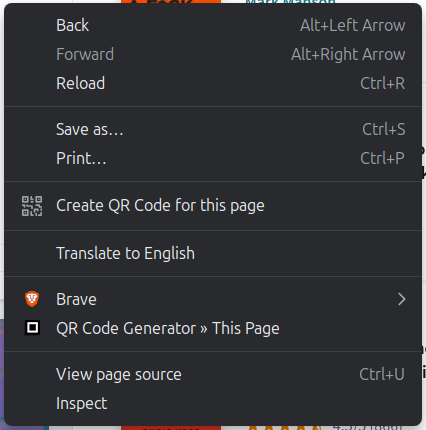

Va a abrir otra ventana con el codigo fuente de la pagina y, abajo del todo se encuentra una seccion que dice
```
<script type='text/javascript'>
```

Lo que hay que copiar y pegar en el bloque de codigo de aca abajo es lo que contiene la etiqueta mencionada antes. Contiene algo asi:
```
'''
docManager.addPage({
          pageNum:  1 ,
          fonts: [],
          origWidth:  901 ,
          origHeight:  656 ,
          containerElem: document.getElementById("outer_page_1"),
          blur:  false ,
          contentUrl: "https://html.scribdassets.com/5xpqt0g2f449x4ab/pages/1-8980513cfd.jsonp"
        });



        docManager.addPage({
          pageNum:  2 ,
          fonts: [],
          origWidth:  901 ,
          origHeight:  656 ,
          containerElem: document.getElementById("outer_page_2"),
          blur:  true ,
          contentUrl: "https://html.scribdassets.com/5xpqt0g2f449x4ab/pages/2-52ecefd63c.jsonp"
        });

        {y los que falten}
'''
```

In [ ]:
js_code = '''

'''

In [ ]:
# RECUPERA LAS URL QUE CONTIENEN EL PATH A LAS IMAGENES

def extract_content_urls(js_code, min_page_num, max_page_num):
    # Define the regular expression to capture the pageNum and contentUrl
    pattern = re.compile(r'docManager\.addPage\({\s*pageNum:\s*(\d+)\s*,[^}]*contentUrl:\s*"([^"]+)"', re.MULTILINE)

    # Find all matches for pageNum and contentUrl
    matches = pattern.findall(js_code)

    # Filter matches based on the specified pageNum range
    filtered_urls = {}
    for page_num, url in matches:
        page_num = int(page_num)
        if min_page_num <= page_num <= max_page_num:
            filtered_urls[page_num] = url

    return filtered_urls

In [ ]:
# RECUPERA EL CONTENIDO DE UNA URL ESPECIFICADA

def fetch_url_content(url):
    try:
        # Send a GET request to the URL
        response = requests.get(url)

        # Raise an error if the request was unsuccessful
        response.raise_for_status()

        # Return the content of the response
        return response.text

    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch content from {url}: {e}")
        return None

In [ ]:
# RECUPERA EL PATH DE LA IMAGEN

def extract_orig_urls(content):

    # Improved regular expression to capture 'orig' URLs, accounting for possible escape characters or variations
    pattern = re.compile(r'orig="([^"]+)"')

    # Find all matches of 'orig' URLs
    orig_urls = pattern.findall(content)

    return orig_urls

In [ ]:
def download_image(image_url, image_name):
  # Send a GET request to the URL
  response = requests.get(image_url)

  # Check if the request was successful
  if response.status_code == 200:
      # Open the image from the response content
      image = Image.open(BytesIO(response.content))

      # Save the image to a file
      image.save(image_name)
      print(f"Image downloaded and saved as {image_name}'")
  else:
      print("Failed to retrieve the image. Status code:", response.status_code)

In [ ]:
min_page_num = 0
max_page_num = 600

result = extract_content_urls(js_code, min_page_num, max_page_num) # AGARRO CADA URL DE DONDE TENGO QUE CHUPAR INFORMACION

all_image_paths = []

for page_num, url in result.items():
    raw_url_content = fetch_url_content(url)
    url_content = raw_url_content.encode().decode('unicode_escape')
    print(f'Processing image from page {page_num}')
    result = extract_orig_urls(url_content)
    for img in result:
      new_path = '/content/drive/MyDrive/Colab Notebooks/Casio_fx8700/Page '+str(page_num)+'.jpg'
      all_image_paths.append(new_path)
      download_image(img, new_path)

Processing image from page 1
Image downloaded and saved as /content/drive/MyDrive/Colab Notebooks/Casio_fx8700/Page 1.jpg'
Processing image from page 2
Image downloaded and saved as /content/drive/MyDrive/Colab Notebooks/Casio_fx8700/Page 2.jpg'
Processing image from page 3
Image downloaded and saved as /content/drive/MyDrive/Colab Notebooks/Casio_fx8700/Page 3.jpg'
Processing image from page 4
Image downloaded and saved as /content/drive/MyDrive/Colab Notebooks/Casio_fx8700/Page 4.jpg'
Processing image from page 5
Image downloaded and saved as /content/drive/MyDrive/Colab Notebooks/Casio_fx8700/Page 5.jpg'
Processing image from page 6
Image downloaded and saved as /content/drive/MyDrive/Colab Notebooks/Casio_fx8700/Page 6.jpg'
Processing image from page 7
Image downloaded and saved as /content/drive/MyDrive/Colab Notebooks/Casio_fx8700/Page 7.jpg'
Processing image from page 8
Image downloaded and saved as /content/drive/MyDrive/Colab Notebooks/Casio_fx8700/Page 8.jpg'
Processing image

In [ ]:
def images_to_pdf(image_files, output_pdf):
    c = canvas.Canvas(output_pdf, pagesize=letter)
    width, height = letter

    for image_file in image_files:
        img = Image.open(image_file)
        img_width, img_height = img.size

        # Ajusta el tamaño de la imagen al tamaño de la página
        if img_width > width or img_height > height:
            img.thumbnail((width, height))
            img_width, img_height = img.size

        c.drawImage(image_file, 0, 0, width=img_width, height=img_height)
        c.showPage()

    c.save()

# Lista de tus archivos de imagen
output_pdf = 'Casio_fx8700.pdf'

images_to_pdf(all_image_paths, output_pdf)